In [4]:
pd.set_option('display.max_columns', None)
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from sklearn.pipeline import make_pipeline
from scipy import stats

In [3]:
import numpy as np

import pandas as pd

import warnings
warnings.filterwarnings("ignore")


In [5]:
df = pd.read_excel('data.xlsx')

In [6]:
df

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,0,6.239374,175.482382,28.125000,5.094096,5.094096,0.387225,0.387225,0.417362,42.928571,384.652,340.300,384.350449,158,0,0.038844,-0.293526,0.293526,0.038844,0.642857,1.035714,1.321429,14.822266,9.700470,2.600532,-2.343082,2.644698,-2.322229,5.944519,0.193481,3.150503,1.164038,611.920301,20.208896,19.534409,19.534409,13.127794,12.204226,12.204226,12.058078,12.058078,10.695991,10.695991,7.340247,7.340247,-0.66,2.187750e+06,20.606247,6.947534,2.868737,173.630124,0.000000,0.000000,0.0,0.00000,0.0,0.000000,9.984809,0.000000,0.000000,0.0,54.384066,74.032366,35.342864,0.000000,0.000000,11.423370,0.0,0.000000,43.480583,105.750639,13.089513,0.000000,0,0.0,0.000000,0.000000,0.0,0.000000,24.512883,0.000000,33.495774,105.750639,9.984809,0.0,0.0,0,24.72,0.000000,0.000000,0.0,0.000000,21.659962,24.925325,64.208216,11.423370,0.000000,41.542423,9.984809,0.000000,0.000000,10.188192,0.000000,4.807589,1.764908,0.000000,13.258223,16.981087,0.000000,0.923077,28,0,2,4,0,4,0,0,0,2,0,2,7,4,0,4,4,7.1212,121.5300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0
1,1,0.771831,5.402819,7.000000,3.961417,3.961417,0.533868,0.533868,0.462473,45.214286,388.684,340.300,388.381750,162,0,0.012887,-0.313407,0.313407,0.012887,0.607143,1.000000,1.285714,14.975110,9.689226,2.614066,-2.394690,2.658342,-2.444817,5.134527,0.120322,3.150503,1.080362,516.780124,20.208896,19.794682,1

Данные содержат 1001 строку и 214 признаков. Сразу можно отметить неинформативный признак "Unnamed: 0".

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1001 entries, 0 to 1000
Columns: 214 entries, Unnamed: 0 to fr_urea
dtypes: float64(107), int64(107)
memory usage: 1.6 MB


Все признаки содержат числовые данные

In [8]:
df.describe()

,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
count,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,998.000000,998.000000,998.000000,998.000000,1001.000000,1001.000000,1001.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,998.000000,1001.000000,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1.001000e+03,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.0,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,1001.000000,10

Есть подозрения(ввиду отсутсвия глубокого понимания процесса создания лекарственных препаратов) на наличие выбросов. Присутствуют признаки с отрицательными значениями и с одними нулями. 

In [9]:
df.isna().sum().sum()

36

Присутствуют незначительное количество пропусков в данных

In [10]:
nan_columns = df.columns[df.isna().any()].tolist()
print("Признаки с NaN:", nan_columns)

Признаки с NaN: ['MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge', 'BCUT2D_MWHI', 'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW', 'BCUT2D_MRHI', 'BCUT2D_MRLOW']


In [11]:
rows_with_nan = df[df.isna().any(axis=1)]
print(f"Найдено {len(rows_with_nan)} строк с NaN:")
rows_with_nan

Найдено 3 строк с NaN:


,Unnamed: 0,"IC50, mM","CC50, mM",SI,MaxAbsEStateIndex,MaxEStateIndex,MinAbsEStateIndex,MinEStateIndex,qed,SPS,MolWt,HeavyAtomMolWt,ExactMolWt,NumValenceElectrons,NumRadicalElectrons,MaxPartialCharge,MinPartialCharge,MaxAbsPartialCharge,MinAbsPartialCharge,FpDensityMorgan1,FpDensityMorgan2,FpDensityMorgan3,BCUT2D_MWHI,BCUT2D_MWLOW,BCUT2D_CHGHI,BCUT2D_CHGLO,BCUT2D_LOGPHI,BCUT2D_LOGPLOW,BCUT2D_MRHI,BCUT2D_MRLOW,AvgIpc,BalabanJ,BertzCT,Chi0,Chi0n,Chi0v,Chi1,Chi1n,Chi1v,Chi2n,Chi2v,Chi3n,Chi3v,Chi4n,Chi4v,HallKierAlpha,Ipc,Kappa1,Kappa2,Kappa3,LabuteASA,PEOE_VSA1,PEOE_VSA10,PEOE_VSA11,PEOE_VSA12,PEOE_VSA13,PEOE_VSA14,PEOE_VSA2,PEOE_VSA3,PEOE_VSA4,PEOE_VSA5,PEOE_VSA6,PEOE_VSA7,PEOE_VSA8,PEOE_VSA9,SMR_VSA1,SMR_VSA10,SMR_VSA2,SMR_VSA3,SMR_VSA4,SMR_VSA5,SMR_VSA6,SMR_VSA7,SMR_VSA8,SMR_VSA9,SlogP_VSA1,SlogP_VSA10,SlogP_VSA11,SlogP_VSA12,SlogP_VSA2,SlogP_VSA3,SlogP_VSA4,SlogP_VSA5,SlogP_VSA6,SlogP_VSA7,SlogP_VSA8,SlogP_VSA9,TPSA,EState_VSA1,EState_VSA10,EState_VSA11,EState_VSA2,EState_VSA3,EState_VSA4,EState_VSA5,EState_VSA6,EState_VSA7,EState_VSA8,EState_VSA9,VSA_EState1,VSA_EState10,VSA_EState2,VSA_EState3,VSA_EState4,VSA_EState5,VSA_EState6,VSA_EState7,VSA_EState8,VSA_EState9,FractionCSP3,HeavyAtomCount,NHOHCount,NOCount,NumAliphaticCarbocycles,NumAliphaticHeterocycles,NumAliphaticRings,NumAromaticCarbocycles,NumAromaticHeterocycles,NumAromaticRings,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,NumSaturatedCarbocycles,NumSaturatedHeterocycles,NumSaturatedRings,RingCount,MolLogP,MolMR,fr_Al_COO,fr_Al_OH,fr_Al_OH_noTert,fr_ArN,fr_Ar_COO,fr_Ar_N,fr_Ar_NH,fr_Ar_OH,fr_COO,fr_COO2,fr_C_O,fr_C_O_noCOO,fr_C_S,fr_HOCCN,fr_Imine,fr_NH0,fr_NH1,fr_NH2,fr_N_O,fr_Ndealkylation1,fr_Ndealkylation2,fr_Nhpyrrole,fr_SH,fr_aldehyde,fr_alkyl_carbamate,fr_alkyl_halide,fr_allylic_oxid,fr_amide,fr_amidine,fr_aniline,fr_aryl_methyl,fr_azide,fr_azo,fr_barbitur,fr_benzene,fr_benzodiazepine,fr_bicyclic,fr_diazo,fr_dihydropyridine,fr_epoxide,fr_ester,fr_ether,fr_furan,fr_guanido,fr_halogen,fr_hdrzine,fr_hdrzone,fr_imidazole,fr_imide,fr_isocyan,fr_isothiocyan,fr_ketone,fr_ketone_Topliss,fr_lactam,fr_lactone,fr_methoxy,fr_morpholine,fr_nitrile,fr_nitro,fr_nitro_arom,fr_nitro_arom_nonortho,fr_nitroso,fr_oxazole,fr_oxime,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_phos_acid,fr_phos_ester,fr_piperdine,fr_piperzine,fr_priamide,fr_prisulfonamd,fr_pyridine,fr_quatN,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
78,78,1127.094988,1127.094988,1.000000,11.617504,11.617504,0.053210,-1.472941,0.344754,12.882353,266.174,263.150,265.983418,84,0,NaN,NaN,NaN,NaN,1.470588,2.117647,2.647059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.679515,2.893801,706.229055,12.740122,8.724523,11.541020,7.913591,4.234380,6.686885,3.069781,5.190391,1.918500,3.205657,1.191889,2.077612,-1.17,7296.319551,12.291220,4.251446,2.012276,113.132727,0.0,0.0,0.0,0.0,0.0,113.560901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.132210,50.640050,0.0,21.908314,0.0,5.156436,6.255769,20.468122,0,0.0,5.559267,5.817863,0.0,0.000000,65.541257,10.799569,10.114318,0.0,9.950974,0.0,5.777654,0,125.29,27.100010,19.117754,0.0,39.179054,0.000000,4.515398,8.467343,0.000000,0.0,15.181342,0.0,13.089387,0.278462,25.148358,17.703941,-0.984907,-0.774720,0.0,1.345753,0.0,-1.472941,0.2,17,0,10,0,0,0,0,2,2,9,0,12,2,0,0,0,2,-2.1368,55.1808,0,0,0,0,0,5,0,0,0,0,0,0,0,0,0,6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
79,79,25.171788,1878.491646,74.626866,11.617504,11.617504,0.053210,-1.472941,0.344754,12.882353,266.174,263.150,265.983418,84,0,NaN,NaN,NaN,NaN,1.470588,2.117647,2.647059,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.679515,2.893801,706.229055,12.740122,8.724523,11.541020,7.913591,4.234380,6.686885,3.069781,5.190391,1.918500,3.205657,1.191889,2.077612,-1.17,7296.319551,12.291220,4.251446,2.012276,113.132727,0.0,0.0,0.0,0.0,0.0,113.560901,0.0,0.0,0.0,0.0,0.0,0.

In [12]:
df = df.drop(columns = ['Unnamed: 0'])
duplicates_mask = df.duplicated()
duplicate_rows = df[duplicates_mask]
print(f"Найдено {len(duplicate_rows)} полных дубликатов:")


Найдено 32 полных дубликатов:


In [13]:
df = df.dropna()
df = df.drop_duplicates()

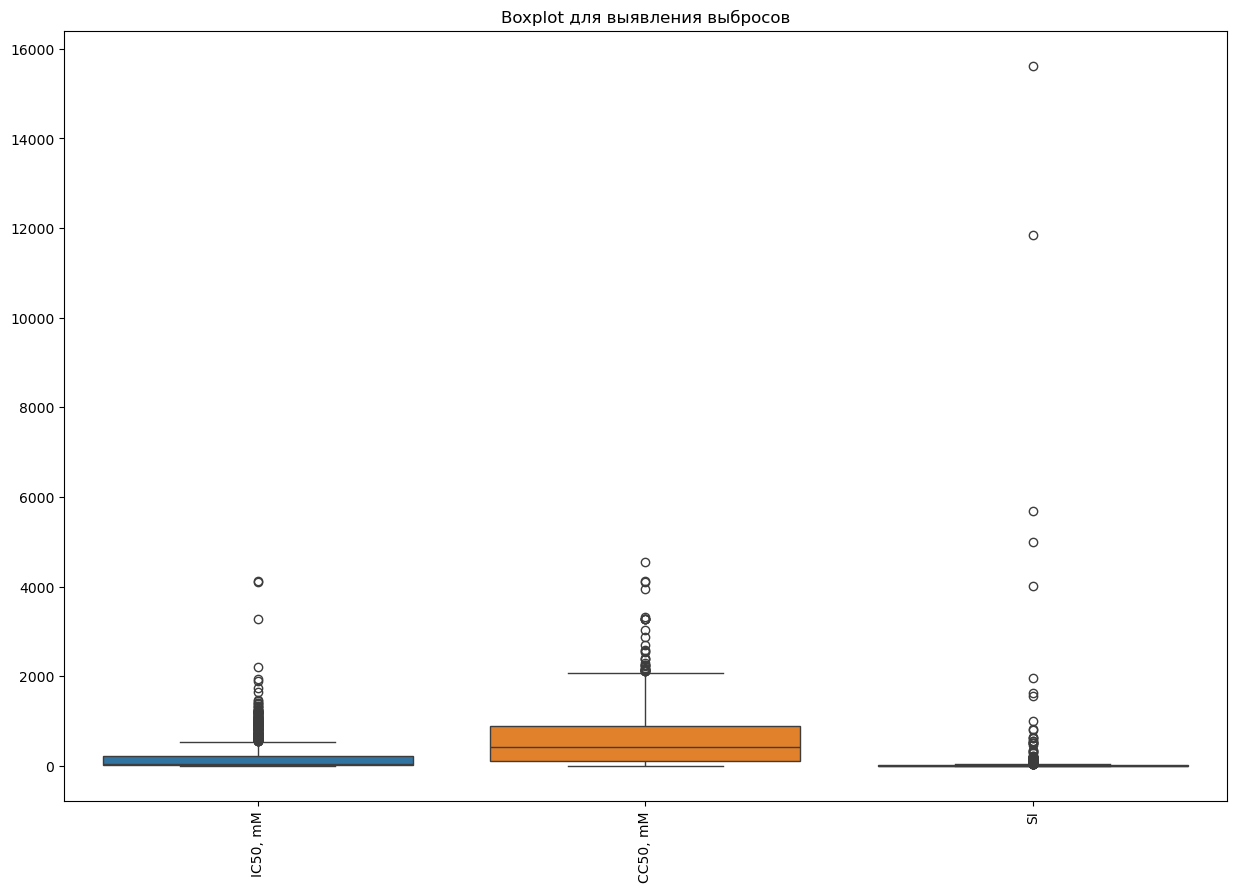

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = df.columns[:3].tolist()

# Построение boxplot для первых 3 признаков (чтобы не перегружать вывод)
plt.figure(figsize=(15, 10))
sns.boxplot(data=df[cols]) 
plt.xticks(rotation=90)
plt.title("Boxplot для выявления выбросов")
plt.show()

In [15]:
def detect_outliers(df, alpha=0.05, method='iqr', normality_test='shapiro', add_sum_column=False):
    outliers = pd.DataFrame(False, index=df.index, columns=df.columns)
    for col in df.columns:
        data = df[col].dropna()
        if len(data) < 3:
            continue
        normal = False
        try:
            if normality_test == 'shapiro':
                _, p = stats.shapiro(data)
                normal = p > alpha
            elif normality_test == 'normaltest':
                _, p = stats.normaltest(data)
                normal = p > alpha
            elif normality_test == 'anderson':
                result = stats.anderson(data)
                normal = result.statistic < result.critical_values[np.where(result.significance_level == int(alpha*100))[0][0]]
        except:
            pass
        if normal:
            z = np.abs(stats.zscore(data))
            outliers.loc[data.index, col] = z > 3
        else:
            if method == 'iqr':
                q1 = data.quantile(0.25)
                q3 = data.quantile(0.75)
                iqr = q3 - q1
                lower_bound = q1 - 1.5 * iqr
                upper_bound = q3 + 1.5 * iqr
                outliers.loc[data.index, col] = (data < lower_bound) | (data > upper_bound)
            elif method == 'zscore':
                median = data.median()
                mad = stats.median_abs_deviation(data, scale='normal')
                modified_z = np.abs(0.6745 * (data - median) / mad)
                outliers.loc[data.index, col] = modified_z > 3.5
    if add_sum_column:
        outliers['outliers_sum'] = outliers.sum(axis=1)
    return outliers



# 1. Находим выбросы
outliers = detect_outliers(df)

In [16]:
print("\nКоличество выбросов по признакам:")
print(outliers.sum())


Количество выбросов по признакам:
IC50, mM             140
CC50, mM              35
SI                   119
MaxAbsEStateIndex     60
MaxEStateIndex        60
                    ... 
fr_thiazole           52
fr_thiocyan            0
fr_thiophene          68
fr_unbrch_alkane      49
fr_urea                7
Length: 213, dtype: int64


In [17]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore')

def validate_molecular_descriptors(df):
    """
    Проводит комплексную проверку 213 молекулярных дескрипторов без SMILES.
    
    Параметры:
    ----------
    df : pd.DataFrame
        DataFrame с молекулярными дескрипторами (213 признаков)
    
    Возвращает:
    -----------
    tuple: (DataFrame с ошибками, DataFrame с итоговой статистикой)
    """
    
    # Инициализация словаря для хранения ошибок
    errors = {
        'row_index': [],
        'descriptor': [],
        'value': [],
        'error_type': [],
        'expected_range': []
    }
    
    # Полный список всех 213 дескрипторов для проверки
    all_descriptors = [
        'IC50, mM', 'CC50, mM', 'SI', 'MaxAbsEStateIndex', 'MaxEStateIndex', 
        'MinAbsEStateIndex', 'MinEStateIndex', 'qed', 'SPS', 'MolWt', 
        'HeavyAtomMolWt', 'ExactMolWt', 'NumValenceElectrons', 'NumRadicalElectrons',
        'MaxPartialCharge', 'MinPartialCharge', 'MaxAbsPartialCharge', 'MinAbsPartialCharge',
        'FpDensityMorgan1', 'FpDensityMorgan2', 'FpDensityMorgan3', 'BCUT2D_MWHI',
        'BCUT2D_MWLOW', 'BCUT2D_CHGHI', 'BCUT2D_CHGLO', 'BCUT2D_LOGPHI', 'BCUT2D_LOGPLOW',
        'BCUT2D_MRHI', 'BCUT2D_MRLOW', 'AvgIpc', 'BalabanJ', 'BertzCT', 'Chi0', 'Chi0n',
        'Chi0v', 'Chi1', 'Chi1n', 'Chi1v', 'Chi2n', 'Chi2v', 'Chi3n', 'Chi3v', 'Chi4n',
        'Chi4v', 'HallKierAlpha', 'Ipc', 'Kappa1', 'Kappa2', 'Kappa3', 'LabuteASA',
        'PEOE_VSA1', 'PEOE_VSA10', 'PEOE_VSA11', 'PEOE_VSA12', 'PEOE_VSA13', 'PEOE_VSA14',
        'PEOE_VSA2', 'PEOE_VSA3', 'PEOE_VSA4', 'PEOE_VSA5', 'PEOE_VSA6', 'PEOE_VSA7',
        'PEOE_VSA8', 'PEOE_VSA9', 'SMR_VSA1', 'SMR_VSA10', 'SMR_VSA2', 'SMR_VSA3',
        'SMR_VSA4', 'SMR_VSA5', 'SMR_VSA6', 'SMR_VSA7', 'SMR_VSA8', 'SMR_VSA9',
        'SlogP_VSA1', 'SlogP_VSA10', 'SlogP_VSA11', 'SlogP_VSA12', 'SlogP_VSA2',
        'SlogP_VSA3', 'SlogP_VSA4', 'SlogP_VSA5', 'SlogP_VSA6', 'SlogP_VSA7',
        'SlogP_VSA8', 'SlogP_VSA9', 'TPSA', 'EState_VSA1', 'EState_VSA10',
        'EState_VSA11', 'EState_VSA2', 'EState_VSA3', 'EState_VSA4', 'EState_VSA5',
        'EState_VSA6', 'EState_VSA7', 'EState_VSA8', 'EState_VSA9', 'VSA_EState1',
        'VSA_EState10', 'VSA_EState2', 'VSA_EState3', 'VSA_EState4', 'VSA_EState5',
        'VSA_EState6', 'VSA_EState7', 'VSA_EState8', 'VSA_EState9', 'FractionCSP3',
        'HeavyAtomCount', 'NHOHCount', 'NOCount', 'NumAliphaticCarbocycles',
        'NumAliphaticHeterocycles', 'NumAliphaticRings', 'NumAromaticCarbocycles',
        'NumAromaticHeterocycles', 'NumAromaticRings', 'NumHAcceptors', 'NumHDonors',
        'NumHeteroatoms', 'NumRotatableBonds', 'NumSaturatedCarbocycles',
        'NumSaturatedHeterocycles', 'NumSaturatedRings', 'RingCount', 'MolLogP', 'MolMR',
        'fr_Al_COO', 'fr_Al_OH', 'fr_Al_OH_noTert', 'fr_ArN', 'fr_Ar_COO', 'fr_Ar_N',
        'fr_Ar_NH', 'fr_Ar_OH', 'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_C_S',
        'fr_HOCCN', 'fr_Imine', 'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1',
        'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_SH', 'fr_aldehyde', 'fr_alkyl_carbamate',
        'fr_alkyl_halide', 'fr_allylic_oxid', 'fr_amide', 'fr_amidine', 'fr_aniline',
        'fr_aryl_methyl', 'fr_azide', 'fr_azo', 'fr_barbitur', 'fr_benzene',
        'fr_benzodiazepine', 'fr_bicyclic', 'fr_diazo', 'fr_dihydropyridine', 'fr_epoxide',
        'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido', 'fr_halogen', 'fr_hdrzine',
        'fr_hdrzone', 'fr_imidazole', 'fr_imide', 'fr_isocyan', 'fr_isothiocyan',
        'fr_ketone', 'fr_ketone_Topliss', 'fr_lactam', 'fr_lactone', 'fr_methoxy',
        'fr_morpholine', 'fr_nitrile', 'fr_nitro', 'fr_nitro_arom', 'fr_nitro_arom_nonortho',
        'fr_nitroso', 'fr_oxazole', 'fr_oxime', 'fr_para_hydroxylation', 'fr_phenol',
        'fr_phenol_noOrthoHbond', 'fr_phos_acid', 'fr_phos_ester', 'fr_piperdine',
        'fr_piperzine', 'fr_priamide', 'fr_prisulfonamd', 'fr_pyridine', 'fr_quatN',
        'fr_sulfide', 'fr_sulfonamd', 'fr_sulfone', 'fr_term_acetylene', 'fr_tetrazole',
        'fr_thiazole', 'fr_thiocyan', 'fr_thiophene', 'fr_unbrch_alkane', 'fr_urea'
    ]

    # Определение допустимых диапазонов для дескрипторов
    descriptor_ranges = {
        # 1. Основные физико-химические свойства
        'MolWt': (0, 2000, "Молекулярный вес"),
        'ExactMolWt': (0, 2000, "Точный молекулярный вес"),
        'HeavyAtomMolWt': (0, 2000, "Вес тяжелых атомов"),
        'MolLogP': (-15, 15, "Логарифм коэффициента распределения"),
        'MolMR': (0, 500, "Молекулярная рефракция"),
        'TPSA': (0, 1000, "Полярная площадь поверхности"),
        'qed': (0, 1, "Квантовая мера сходства с лекарством"),
        'FractionCSP3': (0, 1, "Доля sp3-гибридизированных атомов углерода"),
        
        # 2. Биологические показатели
        'IC50, mM': (0, 100, "Полумаксимальная ингибирующая концентрация"),
        'CC50, mM': (0, 100, "Цитотоксическая концентрация"),
        'SI': (0, 1000, "Индекс селективности"),
        
        # 3. Электронные свойства и заряды
        'MaxPartialCharge': (-2, 2, "Максимальный парциальный заряд"),
        'MinPartialCharge': (-2, 2, "Минимальный парциальный заряд"),
        'MaxAbsPartialCharge': (0, 2, "Максимальный абсолютный заряд"),
        'MinAbsPartialCharge': (0, 2, "Минимальный абсолютный заряд"),
        'NumValenceElectrons': (0, 500, "Валентные электроны"),
        'NumRadicalElectrons': (0, 20, "Неспаренные электроны"),
        
        # 4. Топологические индексы
        'BalabanJ': (0, 20, "Индекс Балабана"),
        'BertzCT': (0, 5000, "Индекс сложности Берца"),
        'Ipc': (0, 1e6, "Информационный индекс"),
        'HallKierAlpha': (-5, 5, "Индекс Холла-Киера"),
        'Kappa1': (0, 100, "Каппа-1 индекс"),
        'Kappa2': (0, 100, "Каппа-2 индекс"),
        'Kappa3': (0, 100, "Каппа-3 индекс"),
        
       # 5. BCUT дескрипторы
        **{f'BCUT2D_{prop}': (-10, 10, f"BCUT 2D {prop}") 
           for prop in ['MWHI', 'MWLOW', 'CHGHI', 'CHGLO', 'LOGPHI', 'LOGPLOW', 'MRHI', 'MRLOW']},
        
        # 6. VSA и EState дескрипторы
        **{f'{prefix}_VSA{num}': (-100, 100, f"{prefix} VSA {num}") 
           for prefix in ['PEOE', 'SMR', 'SlogP', 'EState'] 
           for num in range(1,15) if not (prefix == 'SMR' and num == 9)},
        
        # 7. Фрагментные признаки (должны быть >= 0)
        **{f'fr_{name}': (0, 50, f"Фрагмент {name}") for name in [
            col.replace('fr_','') for col in all_descriptors if col.startswith('fr_')
        ]},
        
        # 8. Количественные подсчеты
        'HeavyAtomCount': (0, 500, "Количество тяжелых атомов"),
        'NHOHCount': (0, 50, "Количество OH/NH групп"),
        'NOCount': (0, 50, "Количество азота и кислорода"),
        'NumHAcceptors': (0, 50, "Акцепторы водорода"),
        'NumHDonors': (0, 50, "Доноры водорода"),
        'NumHeteroatoms': (0, 100, "Гетероатомы"),
        'NumRotatableBonds': (0, 50, "Вращающиеся связи"),
        'RingCount': (0, 20, "Количество циклов"),
        'NumAliphaticRings': (0, 20, "Алифатические циклы"),
        'NumAromaticRings': (0, 20, "Ароматические циклы"),
        'NumSaturatedRings': (0, 20, "Насыщенные циклы"),
        
        # 9. Прочие дескрипторы
        'SPS': (0, 500, "Размер молекулы"),
        'MaxEStateIndex': (-50, 50, "Максимальный EState индекс"),
        'MinEStateIndex': (-50, 50, "Минимальный EState индекс"),
        'FpDensityMorgan1': (0, 100, "Плотность отпечатков Morgan1"),
        'FpDensityMorgan2': (0, 100, "Плотность отпечатков Morgan2"),
        'FpDensityMorgan3': (0, 100, "Плотность отпечатков Morgan3")
    }

    # Функция для добавления ошибки
    def add_error(index, desc, value, err_type, expected):
        errors['row_index'].append(index)
        errors['descriptor'].append(desc)
        errors['value'].append(value)
        errors['error_type'].append(err_type)
        errors['expected_range'].append(expected)

    # Основной цикл проверки
    for idx, row in tqdm(df.iterrows(), total=len(df), desc="Анализ дескрипторов"):
        for desc in all_descriptors:
            if desc not in df.columns:
                continue
                
            value = row[desc]
            
            # Проверка на NaN (хотя вы сказали, что их нет)
            if pd.isna(value):
                add_error(idx, desc, value, 'Missing value', 'Not NaN')
                continue
            
            # Проверка диапазонов
            if desc in descriptor_ranges:
                min_val, max_val, _ = descriptor_ranges[desc]
                if not (min_val <= value <= max_val):
                    add_error(idx, desc, value, 'Value out of range', 
                             f'{min_val}-{max_val}')
            
            # Специальные проверки для фрагментных признаков
            if desc.startswith('fr_') and value < 0:
                add_error(idx, desc, value, 'Negative count', '>=0')
                
            # Проверка целочисленности для счетных признаков
            count_descriptors = [d for d in all_descriptors if 
                                d.startswith('Num') or 
                                d.startswith('fr_') or 
                                d in ['HeavyAtomCount', 'NHOHCount', 'NOCount', 'RingCount',
                                     'NumAliphaticRings', 'NumAromaticRings', 'NumSaturatedRings']]
            if desc in count_descriptors and not float(value).is_integer():
                add_error(idx, desc, value, 'Non-integer value', 'Integer expected')

    # Создание DataFrame с ошибками
    errors_df = pd.DataFrame(errors)
    
    # Группировка ошибок по строкам для итогового отчета
    if not errors_df.empty:
        error_stats = errors_df.groupby('row_index').agg({
            'error_type': lambda x: ', '.join(set(x)),
            'descriptor': lambda x: f"{len(set(x))} descriptors",
            'value': 'count'
        }).rename(columns={'value': 'error_count'})
    else:
        error_stats = pd.DataFrame(columns=['error_type', 'descriptor', 'error_count'])
    
    return errors_df, error_stats

# Пример использования:
errors, stats = validate_molecular_descriptors(df)
print("Обнаружено ошибок:", len(errors))
print("Статистика по строкам:")
print(stats.sort_values('error_count', ascending=False).head(5))


Анализ дескрипторов: 100%|██████████| 966/966 [00:05<00:00, 164.44it/s]

Обнаружено ошибок: 2776
Статистика по строкам:
                   error_type      descriptor  error_count
row_index                                                 
843        Value out of range  10 descriptors           10
8          Value out of range   9 descriptors            9
987        Value out of range   9 descriptors            9
57         Value out of range   8 descriptors            8
60         Value out of range   8 descriptors            8


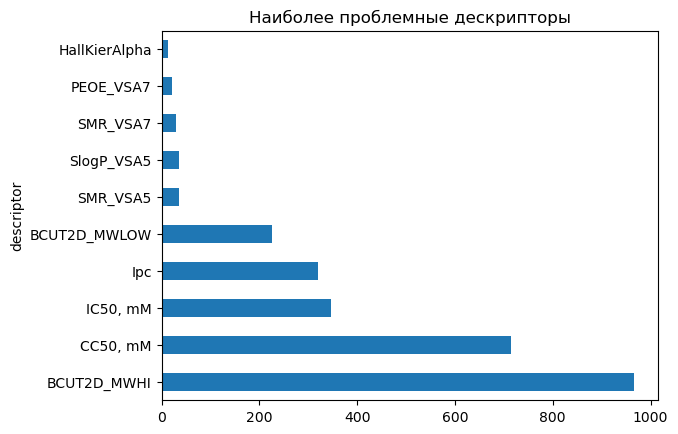

In [18]:
import matplotlib.pyplot as plt

# Топ-10 проблемных дескрипторов
errors['descriptor'].value_counts().head(10).plot(kind='barh')
plt.title('Наиболее проблемные дескрипторы')
plt.show()


Есть подозрения на наличие ошибок в данных, однозначно ответить на этот вопрос мешает непонимание процесов проводимых исследований при создании лекарственных средств.


Анализ корреляций для целевой переменной: IC50, mM

Топ-10 признаков по корреляции с 'IC50, mM':
CC50, mM       0.517785
VSA_EState4   -0.262194
Chi2n         -0.247831
PEOE_VSA7     -0.243810
Chi2v         -0.242226
Chi4v         -0.235211
Chi4n         -0.233219
Chi3n         -0.229346
Chi3v         -0.229339
SlogP_VSA5    -0.225996


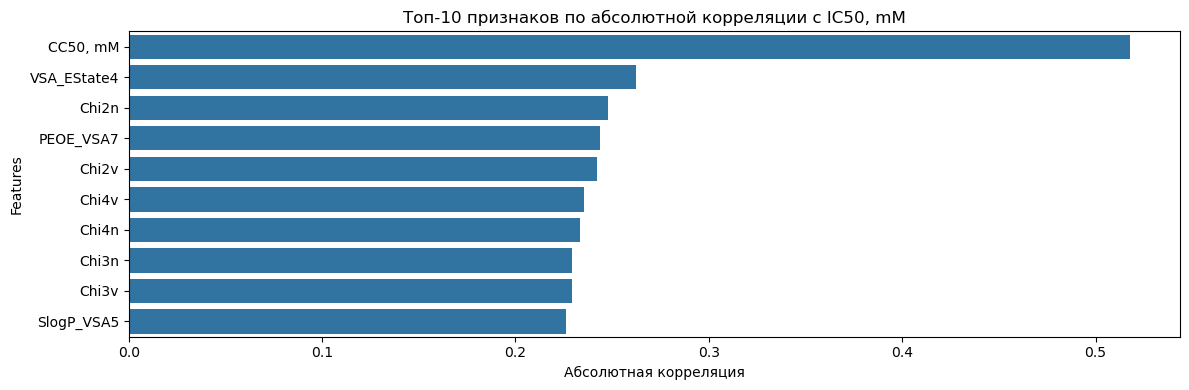


Обнаружено 198 уникальных пар признаков с корреляцией > 0.85:

Топ-20 самых высоких корреляций:
MaxAbsEStateIndex - MaxEStateIndex      1.000000
NumAromaticCarbocycles - fr_benzene     1.000000
fr_Ar_NH - fr_Nhpyrrole                 1.000000
fr_COO - fr_COO2                        1.000000
fr_phenol - fr_phenol_noOrthoHbond      1.000000
ExactMolWt - MolWt                      0.999999
Chi1 - HeavyAtomCount                   0.998733
HeavyAtomMolWt - MolWt                  0.996888
ExactMolWt - HeavyAtomMolWt             0.996857
Chi0 - HeavyAtomCount                   0.995964
Chi0 - NumValenceElectrons              0.994925
HeavyAtomCount - LabuteASA              0.994427
Chi0n - Chi0v                           0.993034
Chi1 - LabuteASA                        0.992897
Chi0 - Chi1                             0.990916
fr_Ar_OH - fr_phenol                    0.990749
fr_Ar_OH - fr_phenol_noOrthoHbond       0.990749
LabuteASA - NumValenceElectrons         0.990668
HeavyAtomCount - NumV

In [19]:
def analyze_correlations(df, target_col, top_n=15, threshold=0.8, figsize=(12, 8)):
    """
    Анализирует корреляции между признаками и целевой переменной.
    Анализирует взаимную корреляции между признаками.
    """
    # Проверка наличия целевой переменной
    if target_col not in df.columns:
        raise ValueError(f"Целевая переменная '{target_col}' не найдена в DataFrame")
    
    print(f"\n{'='*50}")
    print(f"Анализ корреляций для целевой переменной: {target_col}")
    print(f"{'='*50}")
    
    # Вычисление корреляций
    corr_matrix = df.corr(numeric_only=True)
    target_corr = corr_matrix[target_col].drop(target_col).sort_values(key=abs, ascending=False)
    
    # 1. Корреляции с целевой переменной
    print(f"\nТоп-{top_n} признаков по корреляции с '{target_col}':")
    print(target_corr.head(top_n).to_string())
    
    # Визуализация топовых корреляций
    plt.figure(figsize=(figsize[0], figsize[1]//2))
    sns.barplot(x=target_corr.head(top_n).abs(), y=target_corr.head(top_n).index)
    plt.title(f'Топ-{top_n} признаков по абсолютной корреляции с {target_col}')
    plt.xlabel('Абсолютная корреляция')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
    
    # 2. Взаимные корреляции между признаками
    corr_matrix_no_target = df.drop(columns=[target_col]).corr(numeric_only=True).abs()
    np.fill_diagonal(corr_matrix_no_target.values, 0)  # Обнуляем диагональ
    
    # Получаем пары корреляций и удаляем дубликаты
    corr_pairs = corr_matrix_no_target.stack()
    corr_pairs = corr_pairs[corr_pairs > threshold]
    
    # Удаляем дубликаты (a-b и b-a)
    unique_pairs = {}
    for (f1, f2), value in corr_pairs.items():
        if f1 < f2:  # Всегда сохраняем пару в алфавитном порядке
            unique_pairs[(f1, f2)] = value
        else:
            unique_pairs[(f2, f1)] = value
    
    # Сортируем по убыванию корреляции
    sorted_pairs = sorted(unique_pairs.items(), key=lambda x: x[1], reverse=True)
    high_corr_pairs = pd.Series({f"{k[0]} - {k[1]}": v for k, v in sorted_pairs})
    
    high_corr = len(high_corr_pairs)
    
    if high_corr > 0:
        print(f"\nОбнаружено {high_corr} уникальных пар признаков с корреляцией > {threshold}:")
        
        # Ограничиваем вывод для удобства чтения
        print(f"\nТоп-{min(20, high_corr)} самых высоких корреляций:")
        print(high_corr_pairs.head(20).to_string())
        
       
    else:
        print(f"\nНет пар признаков с корреляцией > {threshold}")
    
    return {
        'target_correlations': target_corr,
        'feature_correlations': corr_matrix_no_target,
        'high_corr_pairs': high_corr_pairs if high_corr > 0 else None
    }
results = analyze_correlations(df, target_col='IC50, mM', top_n=10, threshold=0.85)


Анализ корреляций для целевой переменной: CC50, mM

Топ-10 признаков по корреляции с 'CC50, mM':
IC50, mM          0.517785
LabuteASA        -0.310681
MolMR            -0.309228
MolWt            -0.308940
ExactMolWt       -0.308880
Chi0             -0.306980
HeavyAtomMolWt   -0.306651
HeavyAtomCount   -0.306490
Chi1             -0.304969
Kappa1           -0.303726


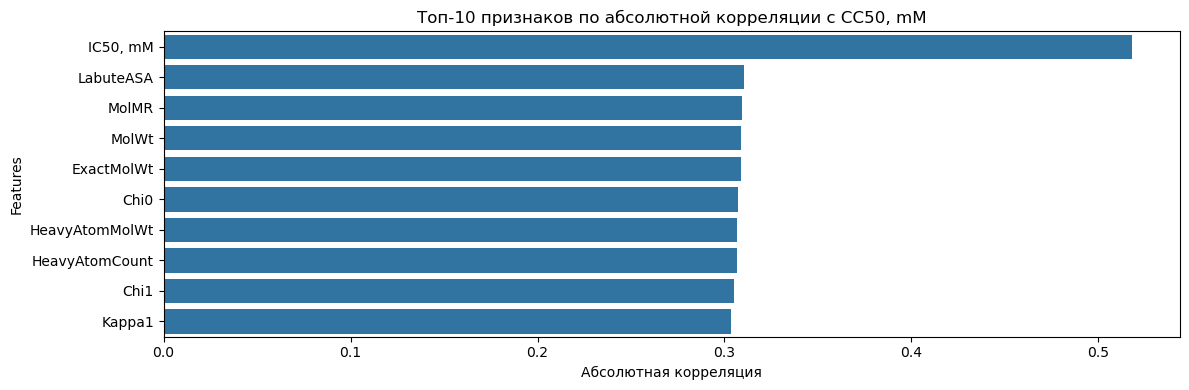

In [20]:
def analyze_correlations(df, target_col, top_n=15, threshold=0.8, figsize=(12, 8)):
    """
    Анализирует корреляции между признаками и целевой переменной.
    Гарантированно исключает дублирование пар корреляций в выводе.
    """
    # Проверка наличия целевой переменной
    if target_col not in df.columns:
        raise ValueError(f"Целевая переменная '{target_col}' не найдена в DataFrame")
    
    print(f"\n{'='*50}")
    print(f"Анализ корреляций для целевой переменной: {target_col}")
    print(f"{'='*50}")
    
    # Вычисление корреляций
    corr_matrix = df.corr(numeric_only=True)
    target_corr = corr_matrix[target_col].drop(target_col).sort_values(key=abs, ascending=False)
    
    # 1. Корреляции с целевой переменной
    print(f"\nТоп-{top_n} признаков по корреляции с '{target_col}':")
    print(target_corr.head(top_n).to_string())
    
    # Визуализация топовых корреляций
    plt.figure(figsize=(figsize[0], figsize[1]//2))
    sns.barplot(x=target_corr.head(top_n).abs(), y=target_corr.head(top_n).index)
    plt.title(f'Топ-{top_n} признаков по абсолютной корреляции с {target_col}')
    plt.xlabel('Абсолютная корреляция')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
    
    
    
    return {
        'target_correlations': target_corr,
        
    }
results = analyze_correlations(df, target_col='CC50, mM', top_n=10, threshold=0.85)


Анализ корреляций для целевой переменной: SI

Топ-10 признаков по корреляции с 'SI':
BalabanJ            0.170718
fr_NH2              0.170333
RingCount          -0.128246
fr_Al_COO           0.104144
fr_COO2             0.102759
fr_COO              0.102759
VSA_EState4         0.090994
NumAromaticRings   -0.090388
FpDensityMorgan1    0.088005
VSA_EState6        -0.085428


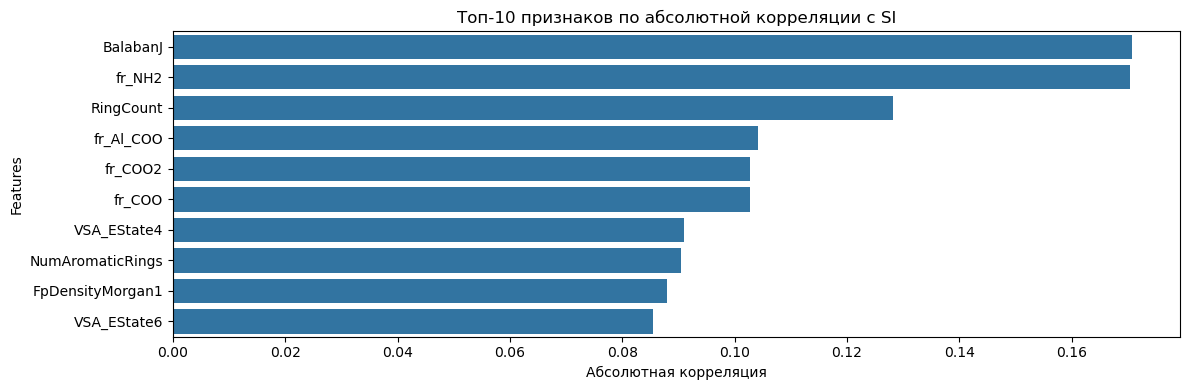

In [21]:
def analyze_correlations(df, target_col, top_n=15, threshold=0.8, figsize=(12, 8)):
    """
    Анализирует корреляции между признаками и целевой переменной.
    Гарантированно исключает дублирование пар корреляций в выводе.
    """
    # Проверка наличия целевой переменной
    if target_col not in df.columns:
        raise ValueError(f"Целевая переменная '{target_col}' не найдена в DataFrame")
    
    print(f"\n{'='*50}")
    print(f"Анализ корреляций для целевой переменной: {target_col}")
    print(f"{'='*50}")
    
    # Вычисление корреляций
    corr_matrix = df.corr(numeric_only=True)
    target_corr = corr_matrix[target_col].drop(target_col).sort_values(key=abs, ascending=False)
    
    # 1. Корреляции с целевой переменной
    print(f"\nТоп-{top_n} признаков по корреляции с '{target_col}':")
    print(target_corr.head(top_n).to_string())
    
    # Визуализация топовых корреляций
    plt.figure(figsize=(figsize[0], figsize[1]//2))
    sns.barplot(x=target_corr.head(top_n).abs(), y=target_corr.head(top_n).index)
    plt.title(f'Топ-{top_n} признаков по абсолютной корреляции с {target_col}')
    plt.xlabel('Абсолютная корреляция')
    plt.ylabel('Features')
    plt.tight_layout()
    plt.show()
    
    
    return {
        'target_correlations': target_corr,
        
    }
results = analyze_correlations(df, target_col='SI', top_n=10, threshold=0.85)